In [13]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import balanced_accuracy_score, classification_report
from sklearn.decomposition import PCA
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

## Retrieve the data

In [14]:
# Import scaled earthquake data
df = pd.read_csv('../../Resources/earthquake_data_standardized.csv')
df.head()

,longitude,latitude,depth,magnitude,number_stations,min_station_distance,nodal_plane_1_dip,nodal_plane_1_rake,nodal_plane_1_strike,nodal_plane_2_dip,...,percent_double_couple,scalar_moment,tensor_mpp,tensor_mrp,tensor_mrr,tensor_mrt,tensor_mtp,tensor_mtt,soil_density,mmi_class
0,-0.858789,0.217395,-0.138401,1.259068,-0.162005,-0.621166,0.764993,0.856091,-0.187953,-3.275980,...,-0.131701,-0.058242,-0.053888,-0.019118,-0.003759,-0.020843,-0.042471,0.055255,-1.885829,2
1,-1.586411,1.453026,2.957343,0.278647,-0.799719,0.182939,-0.322804,-1.396320,-0.143028,0.718901,...,-0.016844,-0.065891,-0.050703,-0.004675,-0.031174,-0.034918,-0.064978,0.059791,0.643055,0
2,-0.451425,1.705352,1.297980,0.866900,-0.368324,2.000126,-0.866703,-0.789901,-0.187953,-1.531736,...,-0.045558,-0.062687,-0.048152,0.025176,-0.045815,-0.028006,-0.074322,0.061360,-0.257281,0
3,-0.891745,0.639950,-0.776489,0.808074,-0.405837,-0.566141,-0.594754,-0.010221,0.620696,0.775167,...,-0.138879,-0.063113,-0.047294,-0.015576,-0.037577,-0.028875,-0.058419,0.058169,1.440778,0
4,0.049063,0.917870,-0.567035,0.866900,1.919944,1.537912,-0.594754,-1.396320,1.564120,0.775167,...,-0.009665,-0.062141,-0.048454,0.008477,-0.034790,-0.019123,-0.052158,0.058550,-0.138119,1


## Create X and y

In [15]:
# Define features and target
X = df.drop(columns='mmi_class', axis=1)
y = df['mmi_class']
display(X.head())
display(y[:5])

,longitude,latitude,depth,magnitude,number_stations,min_station_distance,nodal_plane_1_dip,nodal_plane_1_rake,nodal_plane_1_strike,nodal_plane_2_dip,...,t_axis_plunge,percent_double_couple,scalar_moment,tensor_mpp,tensor_mrp,tensor_mrr,tensor_mrt,tensor_mtp,tensor_mtt,soil_density
0,-0.858789,0.217395,-0.138401,1.259068,-0.162005,-0.621166,0.764993,0.856091,-0.187953,-3.275980,...,3.288087,-0.131701,-0.058242,-0.053888,-0.019118,-0.003759,-0.020843,-0.042471,0.055255,-1.885829
1,-1.586411,1.453026,2.957343,0.278647,-0.799719,0.182939,-0.322804,-1.396320,-0.143028,0.718901,...,0.813702,-0.016844,-0.065891,-0.050703,-0.004675,-0.031174,-0.034918,-0.064978,0.059791,0.643055
2,-0.451425,1.705352,1.297980,0.866900,-0.368324,2.000126,-0.866703,-0.789901,-0.187953,-1.531736,...,-0.542928,-0.045558,-0.062687,-0.048152,0.025176,-0.045815,-0.028006,-0.074322,0.061360,-0.257281
3,-0.891745,0.639950,-0.776489,0.808074,-0.405837,-0.566141,-0.594754,-0.010221,0.620696,0.775167,...,-0.274021,-0.138879,-0.063113,-0.047294,-0.015576,-0.037577,-0.028875,-0.058419,0.058169,1.440778
4,0.049063,0.917870,-0.567035,0.866900,1.919944,1.537912,-0.594754,-1.396320,1.564120,0.775167,...,-0.128764,-0.009665,-0.062141,-0.048454,0.008477,-0.034790,-0.019123,-0.052158,0.058550,-0.138119


0    2
1    0
2    0
3    0
4    1
Name: mmi_class, dtype: int64

## Split Data into Train and Test Data Sets

In [16]:
# Split training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Basic Multinomial Logistic Regression Model

In [17]:
# Instantiate the model and fit it to the train data
lr = LogisticRegression(multi_class='multinomial')
lr.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial')

In [18]:
# Make predictions and calculate balanced accuracy and classification report
train_predict = lr.predict(X_train)
test_predict = lr.predict(X_test)

# Determine balanced accuracies
print(f'Balanced Accuracy - Train: {balanced_accuracy_score(y_train, train_predict):.3f}')
print(f'Balanced Accuracy - Test: {balanced_accuracy_score(y_test, test_predict):.3f}')

# Print classification report
print(classification_report(y_test, test_predict))

Balanced Accuracy - Train: 0.638
Balanced Accuracy - Test: 0.570
              precision    recall  f1-score   support

           0       0.64      0.70      0.67        90
           1       0.45      0.53      0.49        81
           2       0.70      0.48      0.57        69

    accuracy                           0.58       240
   macro avg       0.60      0.57      0.58       240
weighted avg       0.60      0.58      0.58       240



## Evaluate Multinomial Logistic Regression Model Using Reduced Feature Sets

Calculate the p-value of each feature.

In [19]:
# Instantiate and fit a linear regression model for p-value analysis
linreg = sm.OLS(y_train, X_train).fit()

# Show the p-values of all columns sorted in ascending order
linreg.pvalues.sort_values()

magnitude                2.745180e-28
t_axis_length            3.152019e-22
n_axis_length            3.113835e-18
tensor_mrt               5.367820e-18
p_axis_length            3.377154e-16
depth                    1.192114e-10
scalar_moment            5.572708e-10
tensor_mrr               4.452019e-06
tensor_mtt               4.627156e-06
tensor_mpp               4.766431e-06
latitude                 2.049903e-02
soil_density             8.810626e-02
nodal_plane_2_dip        9.344576e-02
min_station_distance     1.039711e-01
percent_double_couple    1.910715e-01
t_axis_plunge            3.287403e-01
nodal_plane_1_rake       4.078700e-01
n_axis_plunge            4.670709e-01
nodal_plane_2_strike     5.207646e-01
nodal_plane_1_strike     5.465542e-01
n_axis_azimuth           5.513783e-01
tensor_mtp               5.599399e-01
longitude                6.405268e-01
t_axis_azimuth           6.414520e-01
nodal_plane_1_dip        6.449932e-01
p_axis_plunge            6.465952e-01
p_axis_azimu

Remove each feature one by one by setting the cutoff value for p to the p-value of each feature.

In [22]:
# Create a list of p-value cutoffs that are equal to the p-values of each feature
cutoffs = linreg.pvalues[linreg.pvalues > min(linreg.pvalues)].sort_values(ascending=False).to_list()
# Create a dictionary to store the results of the feature removal
pvalues_optimization = {'Number of Features Removed': range(1, len(cutoffs)+1),
                        'Cutoffs': cutoffs,
                        'Train Accuracy': [],
                        'Test Accuracy': []}

for cutoff in cutoffs:
    # Remove features from train and test data
    X_train_reduced = X_train[linreg.pvalues[linreg.pvalues < cutoff].keys()]
    X_test_reduced = X_test[linreg.pvalues[linreg.pvalues < cutoff].keys()]

    # Instantiate and fit a Random Forest Classifier model
    lr = LogisticRegression(multi_class='multinomial')
    lr.fit(X_train_reduced, y_train)

    # Make predictions for train and test data
    train_predict = lr.predict(X_train_reduced)
    test_predict = lr.predict(X_test_reduced)

    # Record the accuracy for train and test data
    pvalues_optimization['Train Accuracy'].append(balanced_accuracy_score(y_train, train_predict))
    pvalues_optimization['Test Accuracy'].append(balanced_accuracy_score(y_test, test_predict))

# Create a DataFrame for the results
df_pvalues_optimization = pd.DataFrame(pvalues_optimization).set_index('Number of Features Removed')

display(df_pvalues_optimization)

,Cutoffs,Train Accuracy,Test Accuracy
Number of Features Removed,,,
1,9.253231e-01,0.635019,0.577939
2,8.979141e-01,0.635019,0.573108
3,8.602814e-01,0.632006,0.577223
4,8.279931e-01,0.633231,0.576812
5,6.465952e-01,0.629508,0.590284
6,6.449932e-01,0.629521,0.580211
7,6.414520e-01,0.626427,0.570549
8,6.405268e-01,0.631376,0.563035
9,5.599399e-01,0.633198,0.563035


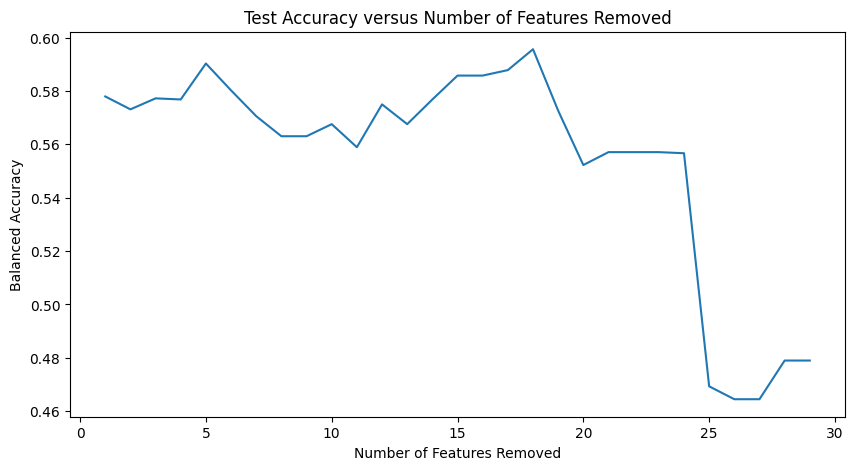

In [23]:
# Plot the Test Accuracy versus the number of features removed
plt.figure(figsize = (10,5))
plt.plot(df_pvalues_optimization.index,
         df_pvalues_optimization['Test Accuracy'])
plt.title('Test Accuracy versus Number of Features Removed')
plt.xlabel('Number of Features Removed')
plt.ylabel('Balanced Accuracy')

plt.show()

In [24]:
# Find the record with the maximim test accuracy
max_test_accuracy = max(df_pvalues_optimization['Test Accuracy'])
max_accuracy_record = df_pvalues_optimization[df_pvalues_optimization['Test Accuracy']==max_test_accuracy]

display(max_accuracy_record)

,Cutoffs,Train Accuracy,Test Accuracy
Number of Features Removed,,,
18,0.093446,0.628122,0.595634


**Conclusion:** Slight improvement of the test accuracy when we remove 18 features leaving 12. However, it is still not very close to our target and the test accuracy is worse than that of the Random Forest Classifier model.

### Reduce Number of Features Using PCA

In [28]:
# Optimize the number of principal components to use
# Define a list used to vary the number of principal components to try from 2 to the number of
# features minus 1.
n_principal_components = range(2, len(X.columns))

pca_optimization = {'Components': n_principal_components,
                    'Explained Variance': [],
                    'Train Accuracy': [],
                    'Test Accuracy': []}

# Loop over the number of principal components to try
for n_comps in n_principal_components:
    # Instantiate a PCA model
    pca = PCA(n_components=n_comps, random_state=1)

    # Fit the PCA model to the train data
    pca.fit(X_train)

    # Transform train and test data
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Record the explained variance
    pca_optimization['Explained Variance'].append(pca.explained_variance_ratio_.sum())

    # Instantiate and fit a Random Forest Classifier model with the PCA feature set
    lr_pca = LogisticRegression(multi_class='multinomial')
    lr_pca.fit(X_train_pca, y_train)

    # Predict the train data and record the Balanced Accuracy Score
    train_pca_predict = lr_pca.predict(X_train_pca)
    pca_optimization['Train Accuracy'].append(balanced_accuracy_score(y_train, train_pca_predict))

    # Predict the test data and record the Balanced Accuracy Score
    test_pca_predict = lr_pca.predict(X_test_pca)
    pca_optimization['Test Accuracy'].append(balanced_accuracy_score(y_test, test_pca_predict))

# Create a DataFrame
df_pca_optimization = pd.DataFrame(pca_optimization).set_index('Components')

display(df_pca_optimization)

,Explained Variance,Train Accuracy,Test Accuracy
Components,,,
2,0.343087,0.526108,0.532260
3,0.427421,0.542306,0.589247
4,0.497379,0.552813,0.558884
5,0.555723,0.570693,0.584505
6,0.611851,0.580625,0.609912
7,0.656105,0.595564,0.596332
8,0.695707,0.615119,0.550170
9,0.730870,0.615085,0.535355
10,0.764880,0.620850,0.524244


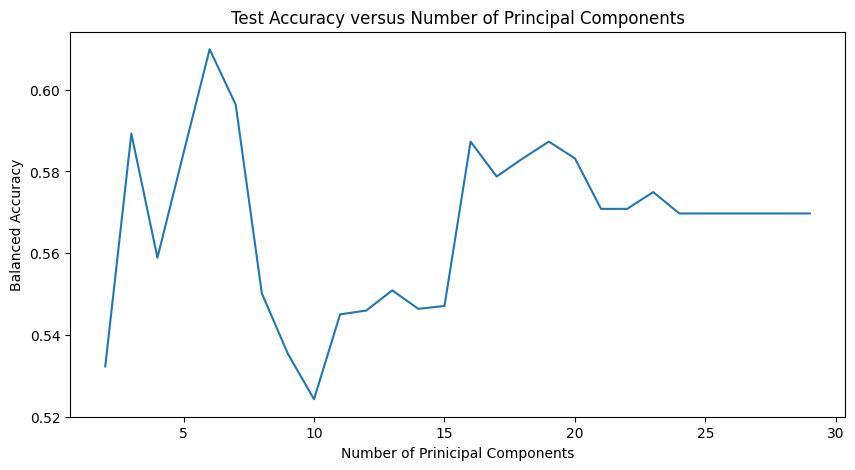

In [29]:
# Plot Accuracy versus number of principal components
plt.figure(figsize = (10,5))
plt.plot(df_pca_optimization.index,
         df_pca_optimization['Test Accuracy'])
plt.title('Test Accuracy versus Number of Principal Components')
plt.xlabel('Number of Prinicipal Components')
plt.ylabel('Balanced Accuracy')

plt.show()

In [30]:
# Find the record with the maximim test accuracy
max_test_accuracy = max(df_pca_optimization['Test Accuracy'])
max_accuracy_record = df_pca_optimization[df_pca_optimization['Test Accuracy']==max_test_accuracy]

display(max_accuracy_record)

,Explained Variance,Train Accuracy,Test Accuracy
Components,,,
6,0.611851,0.580625,0.609912


**Conclusion:** Interstingly enough, this model performs better on the test data than the train data. Can this model be trusted?

## Using Hyperparameter Tuning to Improve Performance

We will vary the following hyperparameters.
* C,
* max_iter.

Please refer to the documentation at https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html for details.

Use a randomized search estimator to explore the hyperparameter space.

In [59]:
# Define a hyperparameter grid
param_grid = {
    'C': [0.0001, 0.001, 0.01, 0.1, 1],
    'max_iter': range(80, 500, 2)
}

# Instantiate a KNN model
lr = LogisticRegression(multi_class='multinomial',
                        penalty='l2',
                        class_weight='balanced')

In [60]:
# Instantiate the Randomized Search Estimator
random_lr = RandomizedSearchCV(lr, param_grid, random_state=0, verbose=3)

# Fit the Randomized Search Estimator on train data
random_lr.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ...............C=0.1, max_iter=188;, score=0.583 total time=   0.0s
[CV 2/5] END ...............C=0.1, max_iter=188;, score=0.604 total time=   0.0s
[CV 3/5] END ...............C=0.1, max_iter=188;, score=0.608 total time=   0.0s
[CV 4/5] END ...............C=0.1, max_iter=188;, score=0.559 total time=   0.0s
[CV 5/5] END ...............C=0.1, max_iter=188;, score=0.629 total time=   0.0s
[CV 1/5] END ..............C=0.01, max_iter=358;, score=0.583 total time=   0.0s
[CV 2/5] END ..............C=0.01, max_iter=358;, score=0.569 total time=   0.0s
[CV 3/5] END ..............C=0.01, max_iter=358;, score=0.531 total time=   0.0s
[CV 4/5] END ..............C=0.01, max_iter=358;, score=0.510 total time=   0.0s
[CV 5/5] END ..............C=0.01, max_iter=358;, score=0.601 total time=   0.0s
[CV 1/5] END ...............C=0.1, max_iter=490;, score=0.583 total time=   0.0s
[CV 2/5] END ...............C=0.1, max_iter=490;

RandomizedSearchCV(estimator=LogisticRegression(class_weight='balanced',
                                                multi_class='multinomial'),
                   param_distributions={'C': [0.0001, 0.001, 0.01, 0.1, 1],
                                        'max_iter': range(80, 500, 2)},
                   random_state=0, verbose=3)

In [61]:
# Print best hyperparameters
print(random_lr.best_params_)

{'max_iter': 188, 'C': 0.1}


In [62]:
# Make predictions with the hypertuned model
random_lr_train_predict = random_lr.predict(X_train)
random_lr_test_predict = random_lr.predict(X_test)

# Calculate and print the balanced accuracies
print(f"Accuracy - Train: {balanced_accuracy_score(y_train, random_lr_train_predict):.3f}")
print(f"Accuracy - Test: {balanced_accuracy_score(y_test, random_lr_test_predict):.3f}")

# Calculate the classification report
print(classification_report(y_test, random_lr_test_predict))

Accuracy - Train: 0.651
Accuracy - Test: 0.559
              precision    recall  f1-score   support

           0       0.61      0.69      0.65        90
           1       0.45      0.41      0.43        81
           2       0.62      0.58      0.60        69

    accuracy                           0.56       240
   macro avg       0.56      0.56      0.56       240
weighted avg       0.56      0.56      0.56       240



**Conclusion:** The Multinomial Logistic Regression model performs consistently worse than the Random Forest Classifier model. Therefore, we will not continue to use it.